In [1]:
import pygame

sprites = pygame.transform.scale(
	pygame.image.load("images/sprites.gif"), [192, 224]
)

bricks = sprites.subsurface(56*2, 64*2, 8*2, 8*2)

brick1 = bricks.subsurface((0, 0, 8, 8))
brick2 = bricks.subsurface((8, 0, 8, 8))
brick3 = bricks.subsurface((8, 8, 8, 8))
brick4 = bricks.subsurface((0, 8, 8, 8))

pygame 2.1.0 (SDL 2.0.16, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
help(brick4)

Help on Surface object:

class Surface(builtins.object)
 |  Surface((width, height), flags=0, depth=0, masks=None) -> Surface
 |  Surface((width, height), flags=0, Surface) -> Surface
 |  pygame object for representing images
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |      copy() -> Surface
 |      create a new copy of a Surface
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  blit(...)
 |      blit(source, dest, area=None, special_flags=0) -> Rect
 |      draw one image onto another
 |  
 |  blits(...)
 |      blits(blit_sequence=((source, dest), ...), doreturn=1) -> [Rect, ...] or None
 |      blits(((source, dest, area), ...)) -> [Rect, ...]
 |      blits(((source, dest, area, special_flags), ...)) -> [Rect, ...]
 |      draw many images onto another
 |  
 |  convert(...)
 |      convert(Surface=None) -> Surface
 |      convert(depth, flags=0

In [4]:
brick4.get_height()

8

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

(192, 224, 3)


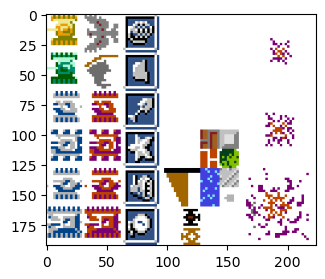

In [12]:
target = sprites

width = target.get_width()
height = target.get_height()

current_buffer = np.array([[[0, 0, 0] for _ in range(height)] for _ in range(width)])
print(current_buffer.shape)
pygame.pixelcopy.surface_to_array(current_buffer, target)

plt.figure(figsize=(4,3))
plt.imshow(current_buffer)
plt.show()

In [17]:
def chunks(l, n):
	""" 把输入字符按n个一组切分
	"""
	return [l[i:i+n] for i in range(0, len(l), n)]

binstr = ""
for h in chunks("0071b63c7ff1e3", 2):
	binstr += str(bin(int(h, 16)))[2:].rjust(8, "0")
binstr = binstr[7:]

x, y = 0, 0
letter_w = 0
surf_letter = pygame.Surface((56, 56))
for j, row in enumerate(chunks(binstr, 7)):
	for i, bit in enumerate(row):
		if bit == "1":
			if i%2 == 0 and j%2 == 0:
				surf_letter.blit(brick1, [x, y])
			elif i%2 == 1 and j%2 == 0:
				surf_letter.blit(brick2, [x, y])
			elif i%2 == 1 and j%2 == 1:
				surf_letter.blit(brick3, [x, y])
			elif i%2 == 0 and j%2 == 1:
				surf_letter.blit(brick4, [x, y])
			if x > letter_w:
				letter_w = x
		x += 8
	x = 0
	y += 8


(56, 56, 3)


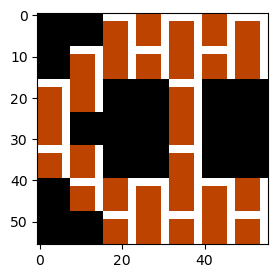

In [20]:
target = surf_letter

width = target.get_width()
height = target.get_height()

current_buffer = np.array([[[0, 0, 0] for _ in range(height)] for _ in range(width)])
print(current_buffer.shape)
pygame.pixelcopy.surface_to_array(current_buffer, target)

plt.figure(figsize=(4,3))
plt.imshow(current_buffer)
plt.show()